In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [2]:
path = r"C:\Users\ahamr\Desktop\Machine Learning\Data Sets"

In [3]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [4]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
# Storing column names in a list
column_names = list(df.columns)
print("Column Names:", column_names)

Column Names: ['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 

In [6]:
#identify the useful numeric columns

columns = ['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_snow_depth', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max', 'GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_global_radiation', 'HEATHROW_precipitation', 'HEATHROW_snow_depth', 'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max', 'KASSEL_wind_speed', 'KASSEL_humidity', 'KASSEL_pressure', 'KASSEL_global_radiation', 'KASSEL_precipitation', 'KASSEL_sunshine', 'KASSEL_temp_mean', 'KASSEL_temp_min', 'KASSEL_temp_max', 'LJUBLJANA_cloud_cover', 'LJUBLJANA_wind_speed', 'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 'LJUBLJANA_global_radiation', 'LJUBLJANA_precipitation', 'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max', 'MAASTRICHT_cloud_cover', 'MAASTRICHT_wind_speed', 'MAASTRICHT_humidity', 'MAASTRICHT_pressure', 'MAASTRICHT_global_radiation', 'MAASTRICHT_precipitation', 'MAASTRICHT_sunshine', 'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max', 'MADRID_cloud_cover', 'MADRID_wind_speed', 'MADRID_humidity', 'MADRID_pressure', 'MADRID_global_radiation', 'MADRID_precipitation', 'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max', 'MUNCHENB_cloud_cover', 'MUNCHENB_humidity', 'MUNCHENB_global_radiation', 'MUNCHENB_precipitation', 'MUNCHENB_snow_depth', 'MUNCHENB_sunshine', 'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max', 'OSLO_cloud_cover', 'OSLO_wind_speed', 'OSLO_humidity', 'OSLO_pressure', 'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_snow_depth', 'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'SONNBLICK_cloud_cover', 'SONNBLICK_wind_speed', 'SONNBLICK_humidity', 'SONNBLICK_pressure', 'SONNBLICK_global_radiation', 'SONNBLICK_precipitation', 'SONNBLICK_sunshine', 'SONNBLICK_temp_mean', 'SONNBLICK_temp_min', 'SONNBLICK_temp_max', 'STOCKHOLM_cloud_cover', 'STOCKHOLM_pressure', 'STOCKHOLM_global_radiation', 'STOCKHOLM_precipitation', 'STOCKHOLM_sunshine', 'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation', 'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max']

In [7]:
#create scaler object using StandardScaler from sklearn.preprocessing
#StandardScaler assumes data is normally distributed and scales with a distribution
#around 0 and standard deviation of 1. Scaling happens independently with each variable.

scaler = StandardScaler()

In [8]:
#create new df with scaled data

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns)
df_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.707657,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.707652,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.707646,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.707641,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [9]:
date_month_df = df[['DATE', 'MONTH']]

In [10]:
df_scaled = df_scaled.drop(['DATE', 'MONTH'], axis=1)

In [11]:
df_scaled_with_date_month = pd.concat([date_month_df, df_scaled], axis=1)

In [12]:
df_scaled_with_date_month.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [13]:
df = df_scaled_with_date_month

In [14]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [15]:
#Reduce to just the mean temperatures
df_temp = df[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [16]:
df_temp.head()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,19600102,1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,19600103,1,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,19600104,1,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,19600105,1,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396


In [17]:
#Reducing dataset to a decade
df_final = df_temp[df_temp['DATE'].astype(str).str.contains('1990')] 
df_final

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
10958,19900101,1,-1.696559,-1.584333,-1.369721,-1.506712,-1.490139,-1.172216,-1.541424,-1.479805,-1.447359,-0.974801,-1.811529,-1.594218,-0.460708,-1.274353,-1.148890
10959,19900102,1,-1.655817,-1.538937,-1.428538,-1.427601,-1.269240,-1.049918,-1.452825,-1.528241,-1.342338,-1.136550,-1.522480,-1.497139,-0.782460,-1.448521,-1.028721
10960,19900103,1,-1.710140,-1.527588,-1.440302,-1.301023,-1.460686,-1.259573,-1.570958,-1.382933,-1.387347,-1.069155,-1.359104,-1.703431,-0.972586,-1.361437,-0.878510
10961,19900104,1,-1.506430,-1.788618,-1.616753,-1.538357,-1.401779,-1.032446,-1.570958,-1.516132,-1.642398,-1.136550,-1.710990,-1.023880,-1.001836,-0.938458,-1.269058
10962,19900105,1,-1.411366,-2.083696,-1.687333,-1.063690,-1.107247,-0.805320,-1.408526,-1.794639,-1.237316,-1.082634,-1.447075,-0.878261,-0.870210,-0.963339,-0.397835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,19901227,12,-0.515042,-1.005527,-1.299141,-0.589023,-0.842167,-0.945090,-0.832631,-1.177080,-0.772222,-0.840010,-0.491955,-0.659834,-0.943336,-0.453275,-0.998679
11319,19901228,12,-0.895301,-1.107669,-1.169744,-0.810534,-0.753808,-0.648078,-1.024596,-1.092317,-0.862240,-0.907406,-1.057487,-0.805452,-1.338213,-0.639884,-0.788384
11320,19901229,12,-0.012558,-1.289256,-1.463829,-0.240934,-0.400369,-0.648078,-0.463468,-1.080208,-0.247115,-0.853490,-0.077232,-0.684104,-0.723959,-0.565240,-1.899944
11321,19901230,12,0.218313,-0.937432,-1.263851,-0.604845,-0.503455,-0.857734,-0.611133,-0.801701,-0.532173,-0.893927,-0.240607,-1.145228,-0.007330,-0.602562,-1.779775


In [18]:
df = df_final.drop(['DATE', 'MONTH'], axis=1)

In [19]:
df.head()

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
10958,-1.696559,-1.584333,-1.369721,-1.506712,-1.490139,-1.172216,-1.541424,-1.479805,-1.447359,-0.974801,-1.811529,-1.594218,-0.460708,-1.274353,-1.148890
10959,-1.655817,-1.538937,-1.428538,-1.427601,-1.269240,-1.049918,-1.452825,-1.528241,-1.342338,-1.136550,-1.522480,-1.497139,-0.782460,-1.448521,-1.028721
10960,-1.710140,-1.527588,-1.440302,-1.301023,-1.460686,-1.259573,-1.570958,-1.382933,-1.387347,-1.069155,-1.359104,-1.703431,-0.972586,-1.361437,-0.878510
10961,-1.506430,-1.788618,-1.616753,-1.538357,-1.401779,-1.032446,-1.570958,-1.516132,-1.642398,-1.136550,-1.710990,-1.023880,-1.001836,-0.938458,-1.269058
10962,-1.411366,-2.083696,-1.687333,-1.063690,-1.107247,-0.805320,-1.408526,-1.794639,-1.237316,-1.082634,-1.447075,-0.878261,-0.870210,-0.963339,-0.397835


In [20]:
#Run the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

In [21]:
principalComponents

array([[-5.62786271e+00,  2.40021511e-01],
       [-5.49762088e+00,  3.95368547e-01],
       [-5.55902264e+00,  2.99921178e-01],
       [-5.68138192e+00,  4.43172535e-01],
       [-5.01727327e+00,  1.38228120e+00],
       [-5.26565581e+00,  1.85603961e+00],
       [-5.25982241e+00,  1.85814557e+00],
       [-5.36115718e+00,  2.01749028e+00],
       [-4.76812313e+00,  2.25897769e+00],
       [-4.43093182e+00,  1.93340010e+00],
       [-4.14701305e+00,  2.36816913e+00],
       [-5.07327657e+00,  1.27018943e+00],
       [-5.12988223e+00,  7.73494428e-01],
       [-5.17513345e+00,  1.43115790e+00],
       [-3.74552811e+00,  2.02165557e+00],
       [-2.49155054e+00,  2.02195544e+00],
       [-2.57089807e+00, -2.10181636e-02],
       [-3.88032510e+00,  7.18610680e-02],
       [-4.25011736e+00,  5.70960568e-01],
       [-3.36284481e+00,  7.29369713e-01],
       [-2.41728537e+00,  9.10408275e-01],
       [-2.68779821e+00,  3.97366847e-01],
       [-2.97683060e+00,  6.40214012e-01],
       [-2.

In [22]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

In [23]:
dfPCA

,PCA1,PCA2
0,-5.627863,0.240022
1,-5.497621,0.395369
2,-5.559023,0.299921
3,-5.681382,0.443173
4,-5.017273,1.382281
...,...,...
360,-3.532339,0.165425
361,-3.908251,0.416242
362,-3.097096,0.112625
363,-3.081941,-0.431613


In [24]:
explained_variance = pca.explained_variance_ratio_

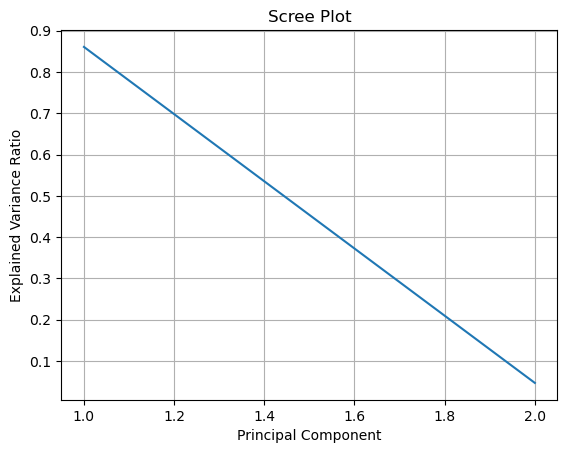

In [25]:
# Create x-axis labels (component numbers starting from 1)
components = range(1, len(explained_variance) + 1)

# Plot the explained variance ratio for each component
plt.plot(components, explained_variance)

# Label the axes
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Add a title
plt.title('Scree Plot')

# Show the plot
plt.grid(True)
plt.show()

### There is an elbow at the second component. This suggests that subsequent components contribute minimally to explaining the data's variance.

#### A sharp drop in the EVR after a certain component indicates that the remaining components contribute less significance in explaining the data's variance.

#### In the context of our data (daily temperatures from 18 seismic stations for 1990), retaining the first two components might be sufficient based on the elbow in the scree plot.

In [26]:
# Export new dataframe as csv
dfPCA.to_csv(os.path.join(path, 'data_pca.csv'))